<a href="https://colab.research.google.com/github/Chahinezehallaci/Chahinezehallaci/blob/main/algorithme_em_gmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering :

1.   Implémenter l'algorithme EM pour un mélange gaussien en utilisant les formules vues en cours.


2.   Implémenter les critères BIC et ICL en utilisant les formules données en cours.

3.   Générer un jeu de données artificiel (simulation) ou utiliser un vrai jeu de données sur lequel appliquer les 2 étapes ci-dessus afin d'illustrer comment elles fonctionnent avec quelques graphiques.


In [ ]:
import random 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

# IMPLEMENTATION ALGORITHME EM GMM

In [ ]:


def em_gmm(x, k) :

    liste_mean=x[np.random.choice(len(x),k)]
    liste_std=[1 for i in range(k)]
    i=0
    while i<200 :
        # E step 
        #Pour chaque points de x on calcule la vraisemblance sous l'hypothese de la gaussienne k avec mean=liste_mean[k] , std=liste_std[k] 
        likelihood_listes=[]
        l=0
        while l < k :
            likelihood_of_data= stats.norm(liste_mean[l], liste_std[l]).pdf(x)
            likelihood_listes.append(likelihood_of_data)
            l=l+1
    
        likelihood_total = sum(likelihood_listes)
        
        #Pour chaque points de x on calcule le poids de la gaussienne k  
        liste_weight=[]
        w=0
        while w<k :
            cluster_weight=likelihood_listes[w]/likelihood_total
            liste_weight.append(cluster_weight)
            w=w+1
        #liste_weight[k] représente le poids de la gausienne pour chaque points de x
    
        # M step
        def estimate_mean(data, weight):
            """
           Pour chaque point de données, on multiplie le point par la probabilité qu'il a été tiré
           de la gausienne k (son "poids"). 
           Ensuite on divise le tout par le poids total : nous trouvons où le poids est centré parmi
           nos points de données.
            """
            return np.sum(data * weight) / np.sum(weight)
        
        def estimate_std(data, weight, mean):
            """
            Pour chaque point de données, on multiplie la différence au carré du point à partir d'une
            valeur moyenne par la probabilité qu'elle a été tirée de cette distribution (son "poids").
            On divise par le poids total : nous trouvons où le poids est centré parmi les valeurs de la
            différence de chaque point de données de la moyenne.
            Ceci est l'estimation de la variance, on prend la racine carré pour trouver l'écart type.
            """
            variance = np.sum(weight * (data - mean)**2) / np.sum(weight)
            return np.sqrt(variance)
        
        
        # nouvelles estimations de l'écart type
        liste_std=[]
        s=0 
        while s<k :
            std_guess=estimate_std(x, liste_weight[s], liste_mean[s])
            liste_std.append(std_guess)
            s=s+1
            
        # nouvelles estimations de la moyenne
        liste_mean=[]
        m=0 
        while m<k :
            mean_guess=estimate_mean(x, liste_weight[m])
            liste_mean.append(mean_guess)
            m=m+1
    
        i=i+1
    
    total_weight=sum([sum(weight_cluster) for  weight_cluster in liste_weight])
    
    #Calcul probabilité des k gaussiennes
    pi=[sum(liste_weight[it])/len(x) for it in range(k)]
    
    #Calcul de la vraisemblance et du bic
    matrix = [k*stats.norm(i,j).pdf(x) for k,i,j in zip(pi,liste_mean,liste_std) ] 
    matrix_bis=np.array( matrix )
    matrix_bis2=np.sum(matrix_bis, axis=0)
    log_L=np.sum(np.log(matrix_bis2))
    nb_param=(3*k)-1
    bic=-2*log_L+nb_param*np.log(len(x))
    #icl=log_L-(1/2)*nb_param*np.log(len(x))+
    
    #Concaténation de tout les résultats dans une liste
    results=[liste_mean, liste_std, pi, log_L, bic ]
    return results

# FONCTION QUI SELECTIONNE LE MEILLEUR MODELE 

In [ ]:
def select_best_bic(X):
    all_results=[]
    bic_list=[]
    #On test notre algorithme de 1 à  10 clustersen récupérant à chauqe fois le résultat 
    for n_clusters in range(1,10,1) :
        results=em_gmm(X,n_clusters)
        bic=results[-1]
        bic_list.append(bic)
        all_results.append(results)
    #On parcours la liste des résultat bic en récupérant le minimum (meilleur) et en retournant les résultat issue du GMM de celui ci
    i=bic_list.index(min(bic_list))
    return all_results[i]

# SIMULATION DONNEES

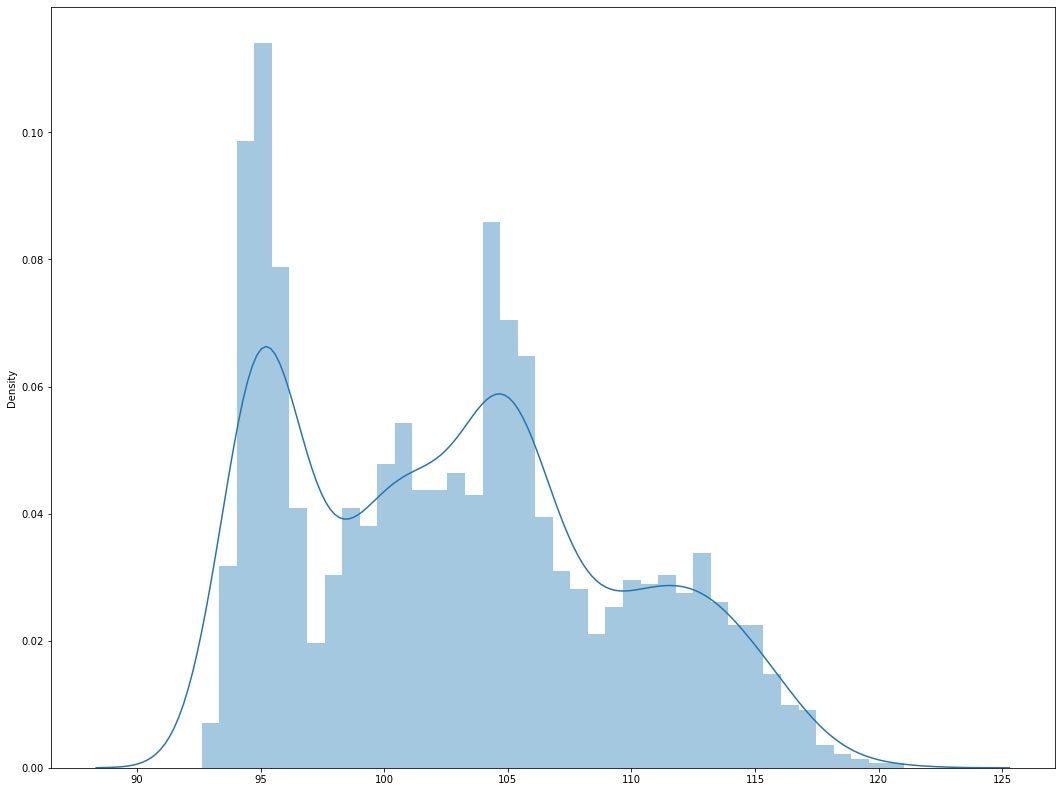

In [ ]:
N = 500
np.random.seed(3)

m1, v1 = 95, 0.8 ## first gaussian
data1 = np.random.normal(m1, v1, N)
#label1 = np.ones(N)

m2, v2 = 100, 2 ## second gaussian
data2 = np.random.normal(m2, v2, N)
#label2 = np.ones(N) * 2    

m3, v3 = 105 , 1.4 ## third gaussian
data3 =np.random.normal(m3, v3, N)
label3 = np.ones(N) * 3


m4, v4 = 112 , 3 ## fourth gaussian
data4 =np.random.normal(m4, v4, N)
label3 = np.ones(N) * 3

X = np.sort(np.concatenate((data1, data2,data3,data4)))

fig = plt.figure(figsize=(18,14))
ax=sns.distplot(X,bins=40, rug=False, kde=True)
plt.show()

# TEST

In [ ]:
best=select_best_bic(X)  
best

[[104.9602583939525, 100.1424395884239, 111.7583843967779, 95.02354066107858],
 [1.468153629053127, 2.0178649330033, 3.0463529869980284, 0.8311123813719711],
 [0.24729604859133447,
  0.2517336015062677,
  0.2486983567949019,
  0.25227199310749626],
 -6147.12328092303,
 12377.856488901021]

## Représentation graphique des résultats

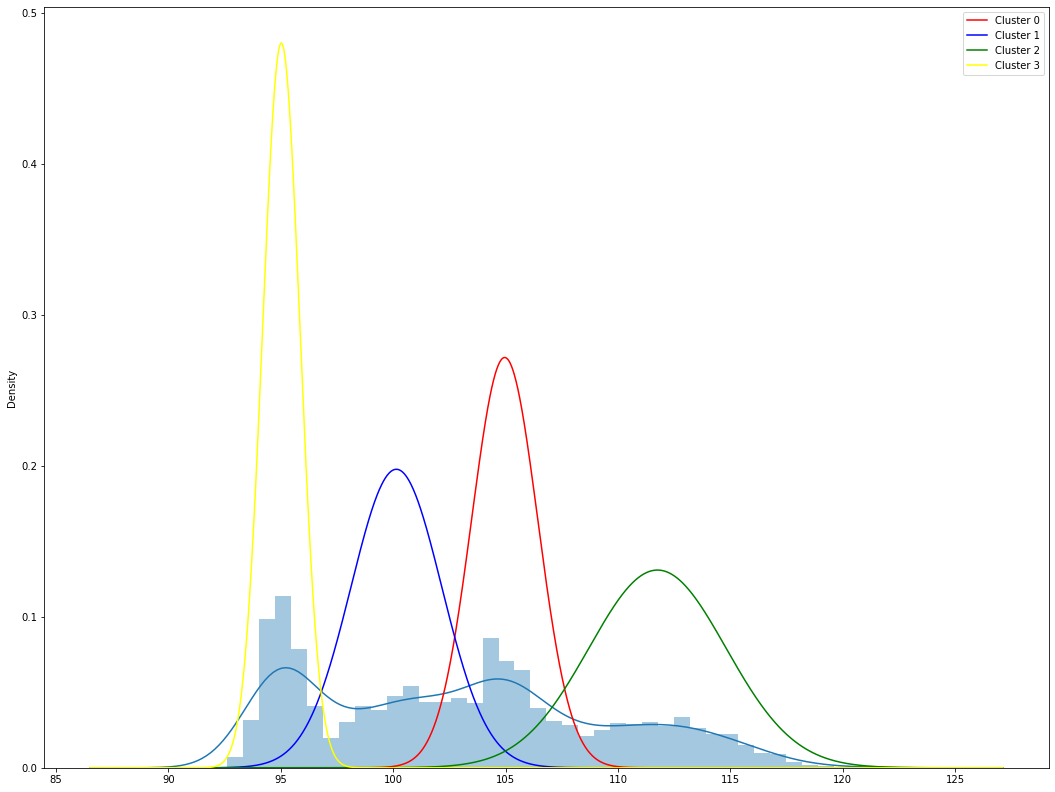

In [ ]:
fig = plt.figure(figsize=(18,14))
ax = sns.distplot(X,bins=40, rug=False, kde=True)
x = np.linspace(*ax.get_xlim(),len(X))
colour = [ "red", "blue", "green", "yellow", "purple", "orange", "white", "black" ]
number=random.randint(1,len(best[0]))
param=[best[0],best[1] ]
for i in range(len(best[0])) :
    plt_ = stats.norm(best[0][i],best[1][i]).pdf(x) 
    plt.plot(x, plt_, label='Cluster '+str(i),color=colour[i])
plt.legend()
plt.show()

## Contrôle des résultats

In [ ]:
#Comparaison des résultats avec les fonctions déjà implémenter dans python
from sklearn.mixture import GaussianMixture
Z=X.reshape(-1, 1)
gm = GaussianMixture(n_components=4, random_state=0).fit(Z)
print("Moyennes :")
print(gm.means_)
print("Poids :")
print(gm.weights_)
print("Variances :")
print(gm.covariances_)
print("BIC :")
print(gm.bic(Z))

Moyennes :
[[100.12528804]
 [112.22433991]
 [105.05714923]
 [ 95.05630498]]
Poids :
[0.23258278 0.22552008 0.28241405 0.25948309]
Variances :
[[[3.39978217]]

 [[7.61825785]]

 [[2.81328474]]

 [[0.73410627]]]
BIC :
12383.80644359774
